In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

from sandbox import (
    kosten_pro_medikament,
)

pd.set_option("display.max_rows", None)
pd.options.display.float_format = "{:,.2f}".format

In [2]:
df = pd.read_csv("data/DATENSATZ_UEAI.csv", delimiter=",")

# Entfernen von Sonderzeichen und Buchstaben aus den Spalten Diagnose, Medikament und Eingriff
df["Diagnose"] = df["Diagnose"].str.replace(r"[^0-9]", "", regex=True).fillna("Missing")
df["Medikament"] = (
    df["Medikament"].str.replace(r"[^0-9]", "", regex=True).fillna("Missing")
)
df["Eingriff"] = df["Eingriff"].str.replace(r"[^0-9]", "", regex=True).fillna("Missing")
df.head()

,Versnr,Jahr,Ausgaben,Diagnose,Medikament,Eingriff,Gebjahr
0,1,2018,720.08,37,66,663,1977
1,1,2018,408.20,97,00,003,1977
2,1,2018,85.79,49,50,503,1977
3,1,2018,132.53,Missing,13,Missing,1977
4,2,2018,32.47,04,32,323,1939


# Medikament

In [3]:
medikament_stats = kosten_pro_medikament(df, ['Medikament'], ascending=False)
medikament_stats.round(2).to_csv('data/medikament_stats.csv', index=False)
medikament_stats_year = kosten_pro_medikament(df, ['Jahr', 'Medikament'], ascending=False)
medikament_stats_year.head(20).sort_values(by='Jahr', ascending=False)

Gesamtkosten  Anzahl_Verschreibungen  Anzahl_Versicherte  \
Jahr Medikament                                                             
2021 Missing     1,789,957.97                    4155                4155   
     04            288,046.75                     720                 699   
     11            298,674.30                     722                 696   
     03            313,333.25                     768                 737   
     14            281,720.87                     685                 660   
     99            284,084.36                     329                 324   
     07            285,993.03                     728                 698   
     01            287,920.24                     698                 677   
     13            285,361.13                     689                 668   
     02            285,593.63                     713                 695   
     00            287,466.21                     702                 678   
2020 Missing     1,476,413.34                    4153                4153   
2019 06            298,226.15                     806                 786   
     Missing     1,671,248.89                    4596                4596   
     03            318,635.00                     820                 799   
     09            298,570.17                     775                 755   
     01            287,232.06                     800                 780   
     02            292,967.33                     759                 746   
     04            282,473.60                     775                 751   
2018 Missing     1,471,688.62                    4974                4974   

                 Durchschnittliche_Kosten_pro_Verschreibung  \
Jahr Medikament                                               
2021 Missing                                         430.80   
     04                                              400.06   
     11                                              413.68   
     03                                              407.99   
     14                                              411.27   
     99                                              863.48   
     07                                              392.85   
     01                                              412.49   
     13                                              414.17   
     02                                              400.55   
     00                                              409.50   
2020 Missing                                         355.51   
2019 06                                              370.01   
     Missing                                         363.63   
     03                                              388.58   
     09                                              385.25   
     01                                              359.04   
     02                                              385.99   
     04                                              364.48   
2018 Missing                                         295.88   

                 Durchschnittliche_Kosten_pro_Versicherten  
Jahr Medikament                                             
2021 Missing                                        430.80  
     04                                             412.08  
     11                                             429.13  
     03                                             425.15  
     14                                             426.85  
     99                                             876.80  
     07                                             409.73  
     01                                             425.29  
     13                                             427.19  
     02                                             410.93  
     00                                             423.99  
2020 Missing                                        355.51  
2019 06                                             379.42  
     Missing        

In [15]:
medikament_stats_year.sort_values(by='Durchschnittliche_Kosten_pro_Verschreibung', ascending=False).head(1)

,,Gesamtkosten,Anzahl_Verschreibungen,Anzahl_Versicherte,Durchschnittliche_Kosten_pro_Verschreibung,Durchschnittliche_Kosten_pro_Versicherten
Jahr,Medikament,,,,,
2021,99,"284,084.36",329,324,863.48,876.80


In [14]:
highest_avg_cost_per_prescription = medikament_stats_year['Durchschnittliche_Kosten_pro_Verschreibung'].idxmax()
highest_avg_cost_per_prescription, medikament_stats_year.loc[highest_avg_cost_per_prescription]

((np.int64(2021), '99'),
 Gesamtkosten                                 284,084.36
 Anzahl_Verschreibungen                           329.00
 Anzahl_Versicherte                               324.00
 Durchschnittliche_Kosten_pro_Verschreibung       863.48
 Durchschnittliche_Kosten_pro_Versicherten        876.80
 Name: (2021, 99), dtype: float64)

Beobachtungen:
- Das Medikament ATC-03 steigt zwischen den Jahren 2019 und 2021 um fast 30 € im Preis. Hier sollte man einen Blick drauf haben.

Allgemeine Kostentrends:
- Die Gesamtkosten variieren erheblich von 650 - 1,1 Mio €.
- Die Durchschnittliche_Kosten_pro_Verschreibung variieren erheblich, von etwa 160 € bis zu 800 €, was auf signifikante Unterschiede in den Verschreibungsmustern oder den Medikamentenpreisen hindeutet.

Kostenintensive Behandlungen:
- Die höchsten durchschnittlichen Kosten pro Verschreibung betragen 863,48 €, was auf besonders teure Medikamente oder Behandlungen hinweist.
- Es gibt mehrere Fälle, in denen die durchschnittlichen Kosten pro Verschreibung über 700 € liegen, was auf spezialisierte oder hochpreisige Therapien hindeutet.

Kosteneffizienz:
- Die durchschnittlichen Kosten pro Verschreibung liegen bei etwa 360 €, was möglicherweise auf günstigere Generika oder weniger komplexe Behandlungen zurückzuführen ist.
- Es gibt eine beträchtliche Spanne zwischen den höchsten und niedrigsten Durchschnittskosten, was Raum für Kostenoptimierung suggeriert. Vielleicht Verträge abschließen?


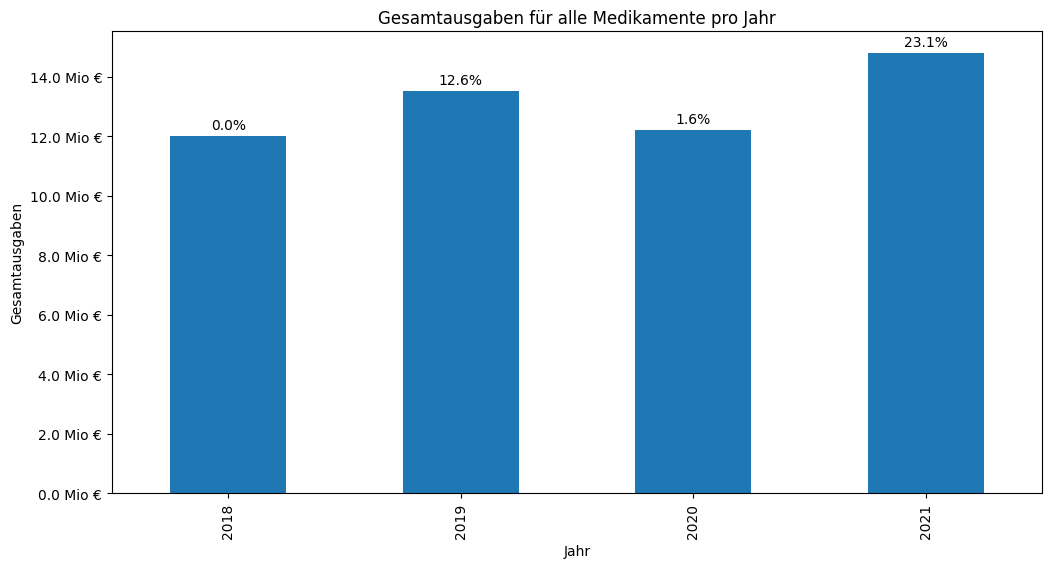

In [6]:
# Berechnung der Gesamtausgaben pro Jahr
kosten_pro_jahr = df.groupby('Jahr')['Ausgaben'].sum()
total_expenses_per_year = kosten_pro_jahr

# Berechnung der relativen Steigerung im Vergleich zu 2018
reference_year = 2018
relative_increase = (total_expenses_per_year / total_expenses_per_year[reference_year] - 1) * 100

# Funktion zum Formatieren der Achsenbeschriftungen
def millions(x, pos):
    return f'{x * 1e-6:.1f} Mio €'

# Plotten der Gesamtausgaben pro Jahr
fig, ax = plt.subplots(figsize=(12, 6))
bars = total_expenses_per_year.plot(kind='bar', ax=ax)
ax.set_title('Gesamtausgaben für alle Medikamente pro Jahr')
ax.set_xlabel('Jahr')
ax.set_ylabel('Gesamtausgaben')
ax.yaxis.set_major_formatter(FuncFormatter(millions))

# Hinzufügen der relativen Steigerung als Text auf die Balken
for bar, increase in zip(bars.patches, relative_increase):
    height = bar.get_height()
    ax.annotate(f'{increase:.1f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', va='bottom')



plt.show()

# Alles eine Frage der Dosis?

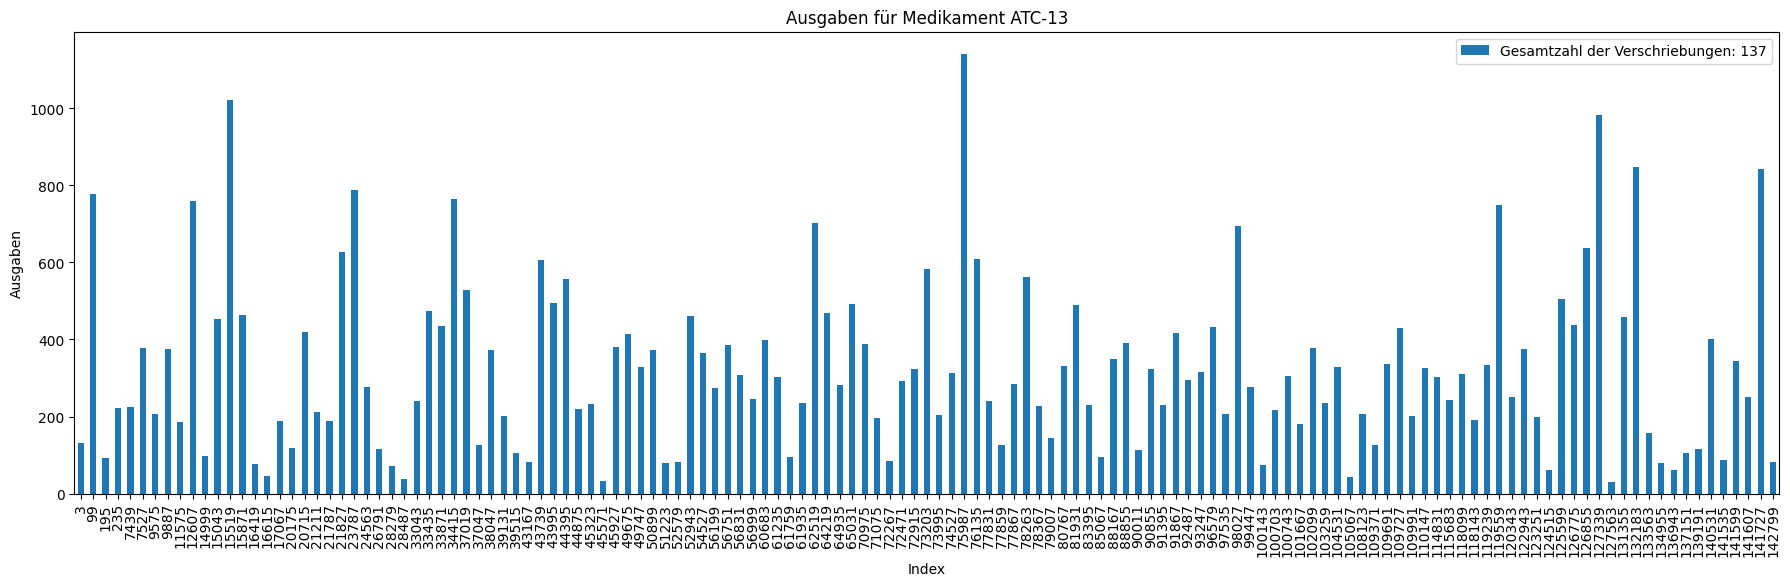

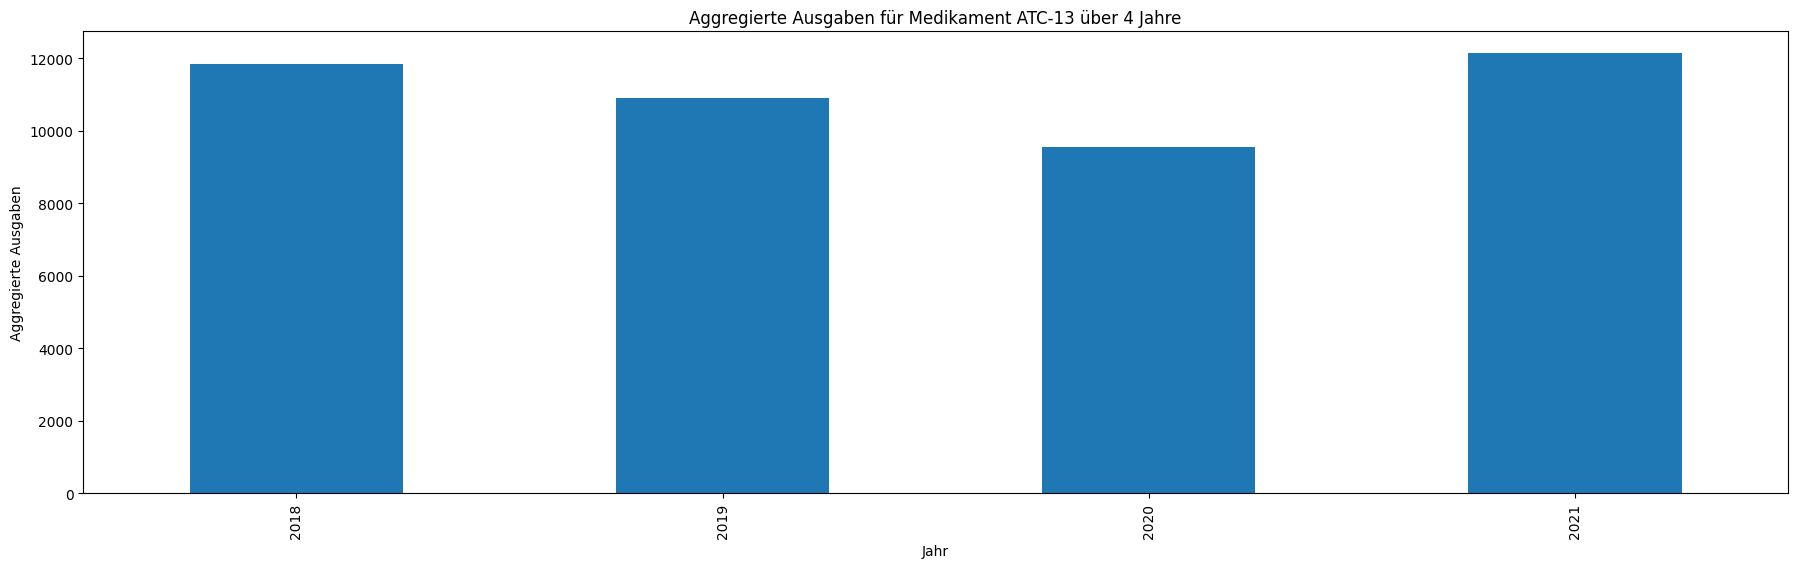

In [7]:
filtered_missing = df[(df['Eingriff'] == 'Missing') & (df['Diagnose'] == 'Missing') & (df['Medikament'] == '13')]
total_prescriptions = filtered_missing['Ausgaben'].count()
filtered_missing['Ausgaben'].plot(kind='bar', figsize=(22, 6))
plt.title('Ausgaben für Medikament ATC-13')
plt.xlabel('Index')
plt.ylabel('Ausgaben')
plt.legend([f'Gesamtzahl der Verschriebungen: {total_prescriptions}'])
plt.show()

# Plotten der aggregierten Ausgaben
aggregated_expenses = filtered_missing.groupby('Jahr')['Ausgaben'].sum()
aggregated_expenses.plot(kind='bar', figsize=(22, 6))
plt.title('Aggregierte Ausgaben für Medikament ATC-13 über 4 Jahre')
plt.xlabel('Jahr')
plt.ylabel('Aggregierte Ausgaben')
plt.show()

In [8]:
kosten_16615 = df.loc[16615, 'Ausgaben']
kosten_75987 = df.loc[75987, 'Ausgaben']

kosten_16615, kosten_75987

(np.float64(45.28), np.float64(1141.92))

# Ersparnis durch Kontingentvertrag?

In [9]:
# Find the three most frequent medications
top_three_medications = df['Medikament'].value_counts().head(3)

print("Die drei häufigsten Medikamente sind:")
top_three_medications

Die drei häufigsten Medikamente sind:


Medikament
Missing    17878
03          3102
02          3074
Name: count, dtype: int64

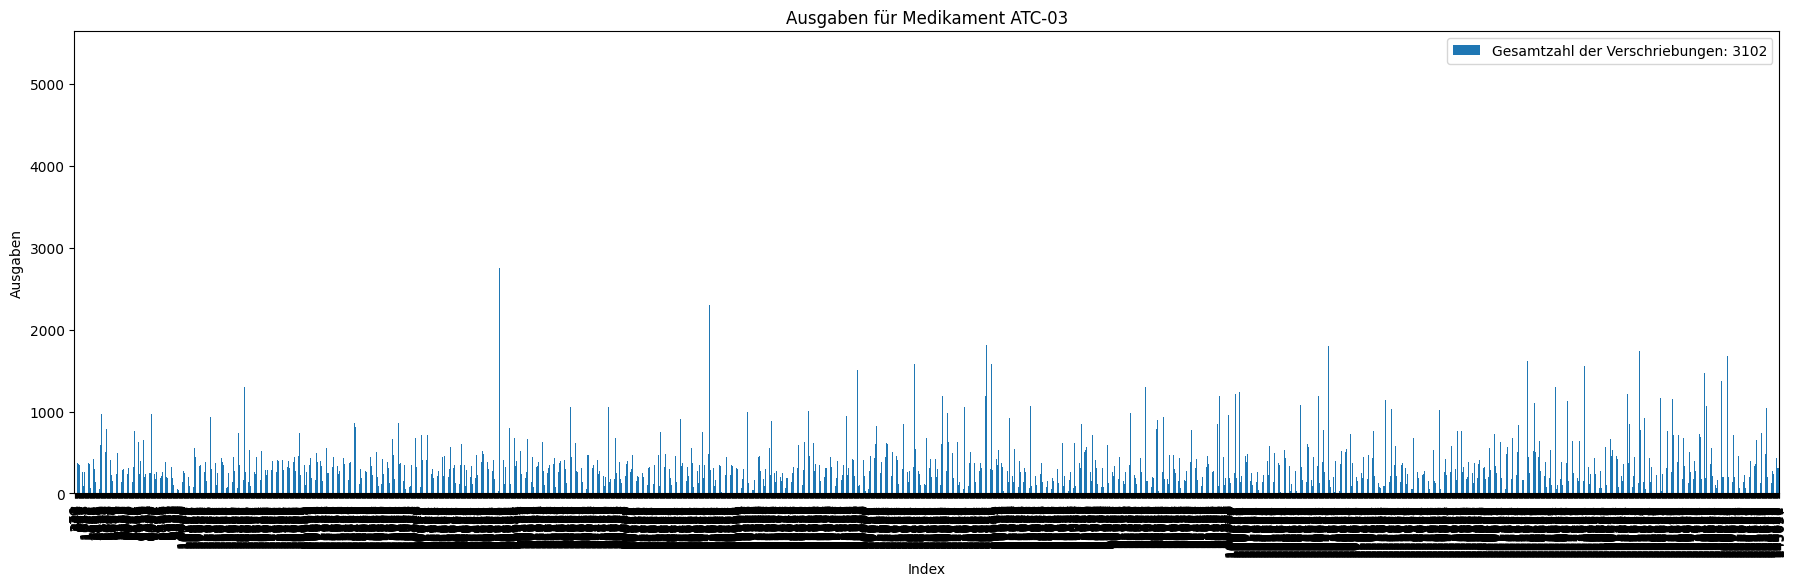

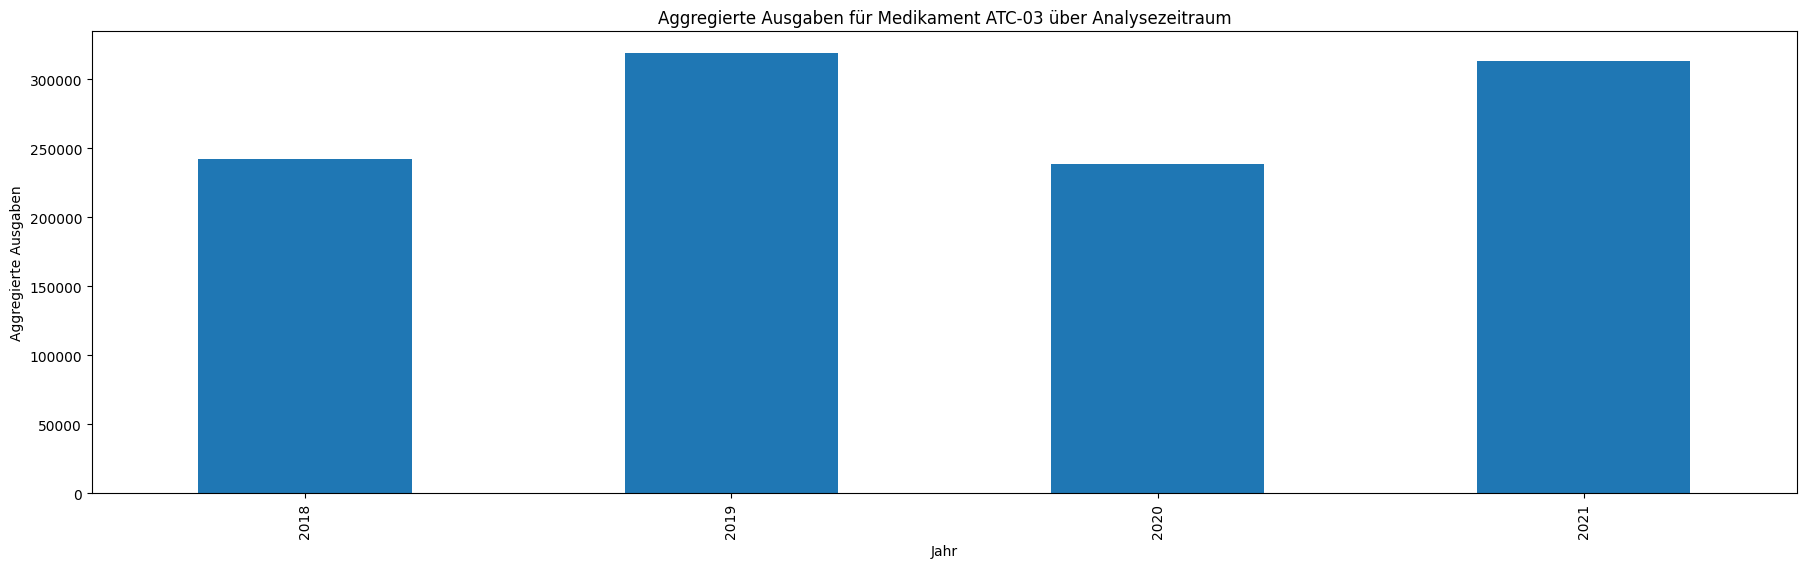

In [12]:
filtered_missing = df[(df['Medikament'] == '03')]
total_prescriptions = filtered_missing['Ausgaben'].count()
filtered_missing['Ausgaben'].plot(kind='bar', figsize=(22, 6))
plt.title('Ausgaben für Medikament ATC-03')
plt.legend([f'Gesamtzahl der Verschriebungen: {total_prescriptions}'])
plt.xlabel('Index')
plt.ylabel('Ausgaben')
plt.show()

# Plotten der aggregierten Ausgaben
aggregated_expenses = filtered_missing.groupby('Jahr')['Ausgaben'].sum()
aggregated_expenses.plot(kind='bar', figsize=(22, 6))
plt.title('Aggregierte Ausgaben für Medikament ATC-03 über Analysezeitraum')
plt.xlabel('Jahr')
plt.ylabel('Aggregierte Ausgaben')
plt.show()

In [19]:
medikament_stats.head(20).sort_values(by='Anzahl_Verschreibungen', ascending=False).head(10)

,Gesamtkosten,Anzahl_Verschreibungen,Anzahl_Versicherte,Durchschnittliche_Kosten_pro_Verschreibung,Durchschnittliche_Kosten_pro_Versicherten
Medikament,,,,,
Missing,"6,409,308.82",17878,7794,358.50,822.34
03,"1,112,719.97",3102,2662,358.71,418.00
02,"1,098,036.58",3074,2673,357.20,410.79
04,"1,063,787.52",3037,2618,350.28,406.34
01,"1,062,211.62",3034,2638,350.10,402.66
00,"1,058,842.71",3018,2607,350.84,406.15
07,"1,026,451.93",2965,2554,346.19,401.90
08,"1,046,717.24",2960,2579,353.62,405.86
05,"1,006,800.99",2948,2558,341.52,393.59


# Neue Medikamente?

In [ ]:
filtered_missing = df[(df['Eingriff'] == 'Missing') & (df['Diagnose'] == 'Missing') & (df['Medikament'] == '99')]
total_prescriptions = filtered_missing['Ausgaben'].count()
filtered_missing['Ausgaben'].plot(kind='bar', figsize=(22, 6))
plt.title('Ausgaben für Medikament ATC-99')
plt.legend([f'Gesamtzahl der Verschriebungen: {total_prescriptions}'])
plt.xlabel('Index')
plt.ylabel('Ausgaben')
plt.show()

# Plotten der aggregierten Ausgaben
aggregated_expenses = filtered_missing.groupby('Jahr')['Ausgaben'].sum()
aggregated_expenses.plot(kind='bar', figsize=(22, 6))
plt.title('Aggregierte Ausgaben für Medikament ATC-99 über Analysezeitraum')
plt.xlabel('Jahr')
plt.ylabel('Aggregierte Ausgaben')
plt.show()